# Scraping Wikipedia Page: Food Security In Nigeria

In [1]:
#Importing the Necessary Libraries

import requests  #get request
import pandas as pd  #Spreadsheet
from bs4 import BeautifulSoup as soup  #html parser
import urllib.request as urequest

In [2]:
url = 'https://en.wikipedia.org/wiki/Food_security_in_Nigeria'

In [3]:
request = urequest.Request(url)

In [4]:
# Opening the url

response = urequest.urlopen(request)

In [5]:
food_security = response.read()
print(food_security)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Food security in Nigeria - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clien

In [11]:
page = soup(food_security, 'html.parser')
print(page)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Food security in Nigeria - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref

In [60]:
data = page.find_all('table', {'class':'wikitable'})
# display no of table
print (f'Number of wikitable tables found: {len(data)}')
# convert the first table to a dataframe
if data:
    table = data[0] # Access the first wikitable
    df = pd.read_html(str(table)) # Use pd t
    

Number of wikitable tables found: 1


C:\Users\DELL\AppData\Local\Temp\ipykernel_32624\3252544248.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table)) # Use pd t


In [62]:
df

[    Year % of Population Annual Change
 0   2018          12.60%         0.70%
 1   2017          11.90%        -0.10%
 2   2016          12.00%         0.90%
 3   2015          11.10%         1.30%
 4   2014           9.80%         1.20%
 5   2013           8.60%         1.00%
 6   2012           7.60%         0.10%
 7   2011           7.50%         0.10%
 8   2010           7.40%         0.10%
 9   2009           7.30%         0.10%
 10  2008           7.20%         0.30%
 11  2007           6.90%        -0.10%
 12  2006           7.00%        −0.40%
 13  2005           7.40%        −0.80%
 14  2004           8.20%        −0.60%
 15  2003           8.80%        −0.30%
 16  2002           9.10%         0.00%
 17  2001           9.10%         0.00%]

In [64]:
type(df)

list

In [66]:
import numpy as np

In [68]:
# Converting the List to a Numpy Array 

df = np.array(df)

In [31]:
type(df)

numpy.ndarray

In [70]:
df.shape

(1, 18, 3)

In [37]:
df.reshape

<function ndarray.reshape>

In [72]:
array_2d = df.reshape (18, 3)

In [74]:
#Converting the array to a DataFrame

df=pd.DataFrame(array_2d)

In [76]:
df

,0,1,2
0,2018,12.60%,0.70%
1,2017,11.90%,-0.10%
2,2016,12.00%,0.90%
3,2015,11.10%,1.30%
4,2014,9.80%,1.20%
5,2013,8.60%,1.00%
6,2012,7.60%,0.10%
7,2011,7.50%,0.10%
8,2010,7.40%,0.10%
9,2009,7.30%,0.10%


In [49]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [78]:
#Restoring column Names

df.rename(columns={0: 'year', 1: '% population', 2: 'annual_change'}, inplace=True)

In [80]:
df

,year,% population,annual_change
0,2018,12.60%,0.70%
1,2017,11.90%,-0.10%
2,2016,12.00%,0.90%
3,2015,11.10%,1.30%
4,2014,9.80%,1.20%
5,2013,8.60%,1.00%
6,2012,7.60%,0.10%
7,2011,7.50%,0.10%
8,2010,7.40%,0.10%
9,2009,7.30%,0.10%


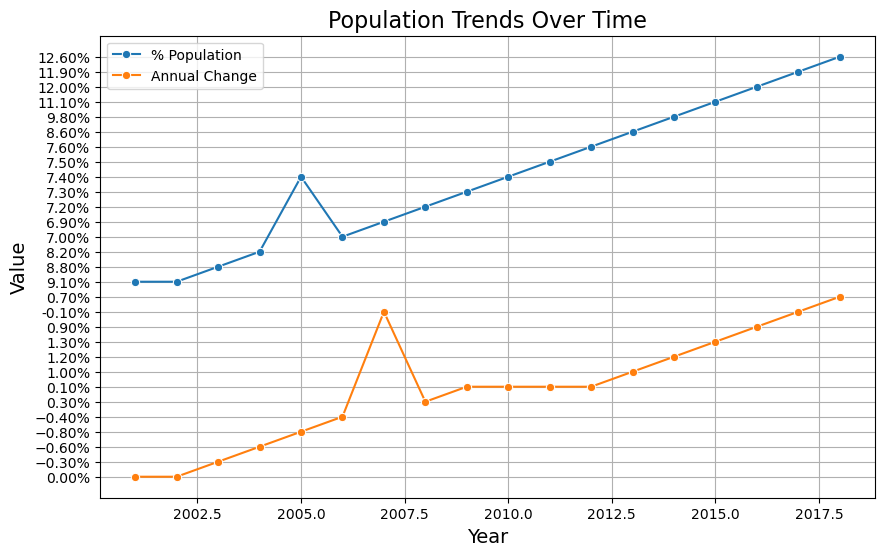

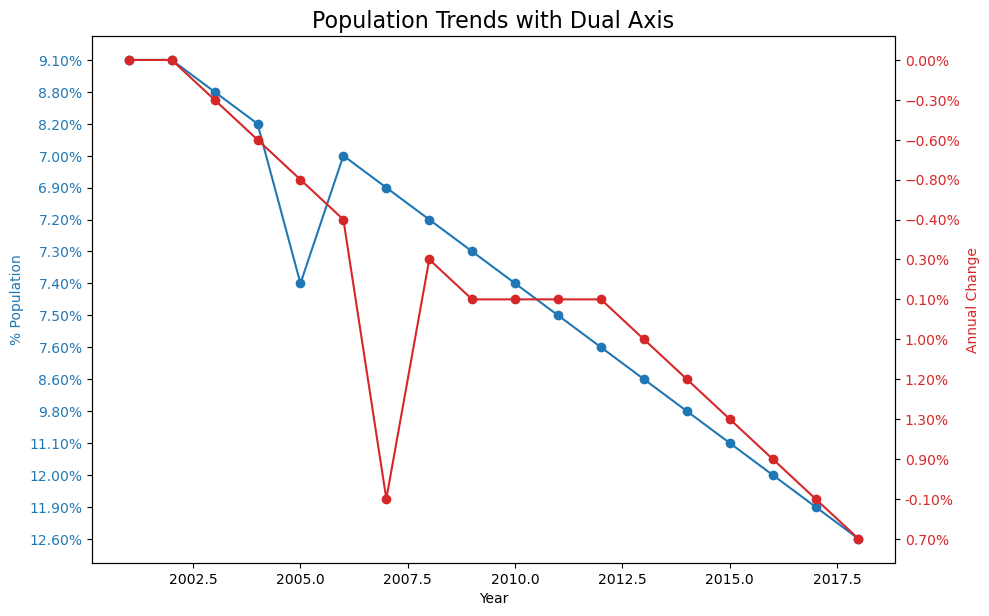

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Line Plot for Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="year", y="% population", marker="o", label="% Population")
sns.lineplot(data=df, x="year", y="annual_change", marker="o", label="Annual Change")
plt.title("Population Trends Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Dual-Axis Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = "tab:blue"
ax1.set_xlabel("Year")
ax1.set_ylabel("% Population", color=color)
ax1.plot(df["year"], df["% population"], marker="o", color=color, label="% Population")
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second y-axis that shares the same x-axis
color = "tab:red"
ax2.set_ylabel("Annual Change", color=color)
ax2.plot(df["year"], df["annual_change"], marker="o", color=color, label="Annual Change")
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.title("Population Trends with Dual Axis", fontsize=16)
plt.show()


### Trends Over Time
The first plot shows the trends of % population and annual_change over the years.

The blue line represents the percentage of the population over time, giving an idea of its growth.
The red line represents the annual change in population, indicating fluctuations or steady changes each year.
This chart helps to compare both metrics side by side and understand how they evolve over time.

### Dual-Axis Plot: Comparative View

The second chart combines both % population and annual_change in a single graph using two y-axes:

The blue line (left axis) shows % population over time.
The red line (right axis) represents the annual change.
This dual-axis plot shows a direct comparison of trends, it illustrates the relationship between the percentage of the population and its annual changes. 